##Guía 1 Visión

---



Ezequiel Vijande

Lucero Guadalupe Fernandez


###Ejercicio 4

(-0.5, 2.5, 2.5, -0.5)

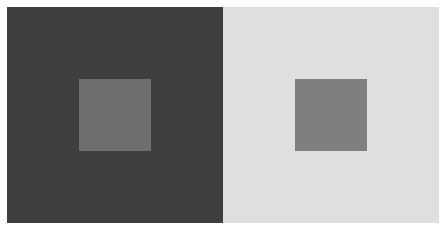

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

center_ = 110
center_l = (center_, center_, center_)
center_r = (127, 127, 127)
dark = (63,63,63)
light = (223,223,223)

img_one = [[dark, dark, dark],
          [dark, center_l, dark],
          [dark, dark, dark]]

img_two = [[light, light, light],
          [light, center_r, light],
          [light, light, light]]

#las ploteamos al lado
f = plt.figure()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
f.add_subplot(1,2, 1)
plt.imshow(img_one)
plt.axis('off')
f.add_subplot(1,2, 2)
plt.imshow(img_two)
plt.axis('off')

COnclusiones:

###Ejercicio 5

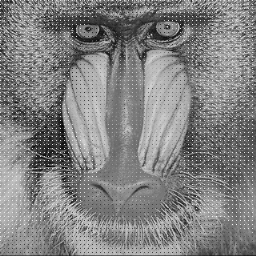

In [3]:
from IPython.display import Image
Image('mono.png')

In [4]:
import cv2

#hay que subir la imagen 'mono.png' si bien la original esta en formato .bmp, google colab no acepta bmp por eso la guard
img = cv2.imread('mono.png')
height, width, channels = img.shape

In [5]:
img.shape

(256, 256, 3)

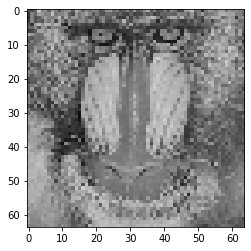

In [6]:
item_a = np.zeros(shape = (64,64,3), dtype=int)
step = 4
x_pos = 1
y_pos = 1
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = img[row+x_pos, col+y_pos]
    item_a[row//step, col//step] = new_pixel

plt.imshow(item_a)

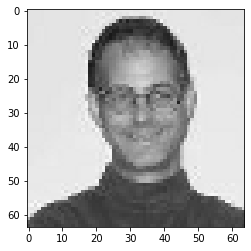

In [7]:
item_b = np.zeros(shape = (64,64,3), dtype=int)
step = 4
x_pos = 0
y_pos = 0
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = img[row+x_pos, col+y_pos]
    item_b[row//step, col//step] = new_pixel

plt.imshow(item_b)

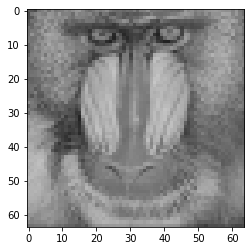

In [8]:
item_c = np.zeros(shape = (64,64,3), dtype=int)
step = 4
for row in range(0, width, step):
  for col in range(0, height, step):
    new_pixel = np.mean(img[row:row+step, col:col+step])
    item_c[row//step, col//step] = new_pixel

plt.imshow(item_c)

#### item d

In [9]:
import numpy as np

def BilinealInterpolation(known_pixels, desired_pixel):
  #Arguments
  x_pixels = known_pixels[0]
  y_pixels = known_pixels[1]
  values = known_pixels[2]
  #Auxiliary terms
  delta_x = x_pixels[1] - x_pixels[0]
  delta_y = y_pixels[1] - y_pixels[0]
  scalar = 1./( delta_x * delta_y )
  x_vector = ( np.array([x_pixels[1]-desired_pixel[0], desired_pixel[0]-x_pixels[0]]) ).reshape((1,2))
  y_vector = ( np.array( [y_pixels[1]-desired_pixel[1], desired_pixel[1]-y_pixels[0]] ) ).reshape((2,1))
  #Computation
  result = np.zeros(shape=3,dtype=int)
  for i in range(0,3):
    first_mult = np.matmul(values[:,:,i], y_vector)
    result[i] = scalar * np.matmul(x_vector, first_mult) 
  return result

  


In [10]:
def InterpolateImg(original_img):
  resized_image = np.zeros(shape=(256,256,3),dtype=int)
  original_pixels = np.linspace(start=0,stop=256,num=64,endpoint=False,dtype=int,)
  for x_pixel in range(0,256):
    if ( x_pixel in original_pixels ):
      x_pixels = [x_pixel, x_pixel+4]
      x_indx = int(x_pixel/4)
    for y_pixel in range(0,256):
      if ( y_pixel in original_pixels ):
        y_pixels = [y_pixel, y_pixel+4]
        y_indx = int(y_pixel/4)
      if  ( x_pixel in original_pixels ) and ( y_pixel in original_pixels ) : #No se interpolan
        resized_image[x_pixel, y_pixel] = original_img[x_indx,y_indx]
      else: #Hace falta interpolar
        if( (x_indx<63)and(y_indx<63) ):
          values = (np.array([ original_img[x_indx,y_indx], original_img[x_indx,y_indx+1]
                            ,original_img[x_indx+1,y_indx], original_img[x_indx+1,y_indx+1] ]) ).reshape((2,2,3))
        known_pixels = (x_pixels, y_pixels, values)
        resized_image[x_pixel, y_pixel] = BilinealInterpolation(known_pixels, [x_pixel, y_pixel])
  return resized_image

Interpolacion bilineal

In [11]:
item_a_resized = InterpolateImg(item_a)
item_b_resized = InterpolateImg(item_b)
item_c_resized = InterpolateImg(item_c)

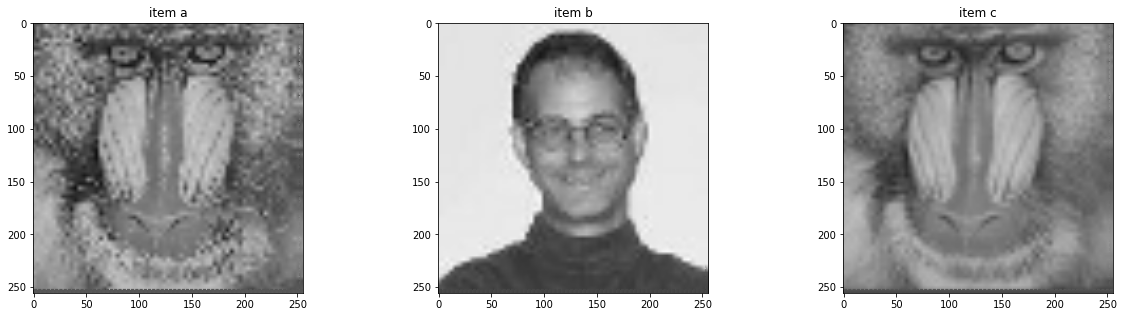

In [12]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0.5)
fig.add_subplot(1,3, 1)
plt.title("item a")
plt.imshow(item_a_resized)

fig.add_subplot(1,3, 2)
plt.title("item b")
plt.imshow(item_b_resized)

fig.add_subplot(1,3, 3)
plt.title("item c")
plt.imshow(item_c_resized)

Interpolacion bicubica



In [36]:
def FiniteDifference(prev,next,step):
  return ( (next-prev)/(2*step) )

def BicubicInterpolation(known_pixels, desired_pixel):

  #Arguments
  x_pixels = known_pixels[0]
  y_pixels = known_pixels[1]
  values = known_pixels[2]

  #Estimate derivatives
  fy = np.zeros(shape=(2,2))
  fx = np.zeros(shape=(2,2))
  fxy = np.zeros(shape=(2,2))
  for i in range(0,2):
    for j in range(0,2):
      step =4
      #Partial derivative on Y
      prev_y = values[1+i,j]
      next_y = values[1+i,j+2]
      fy[i,j] = FiniteDifference(prev_y,next_y,step)
      #Partial derivative on X
      prev_x = values[i,1+j]
      next_x = values[i+2,1+j]
      fx[i,j] = FiniteDifference(prev_x,next_x,step)
      #Partial derivative XY
      prev_xy = values[i,j]
      next_xy = values[i+2,j+2]
      aux_sum = next_xy - next_x - next_y +(2*values[1+i,1+j]) - prev_x - prev_y + prev_xy
      fxy[i,j] = aux_sum / ( 2*step*step )

    #Calculate coefficients
    current_values = np.array([
                               values[1,1:3] ,
                               values[2,1:3]
                               ])
    print("current values mat:\n")
    print(current_values)
    print(current_values.shape)
    print("fy values mat:\n")
    print(fy)
    aux_mat1 = np.concatenate((current_values,fy),axis=1)
    print("concatenacion:\n")
    print(aux_mat1)

    print("fx mat:\n")
    print(fx)
    print("fxy mat:\n")
    print(fxy)
    aux_mat2 = np.concatenate((fx,fxy),axis=1)
    print("Concatenacion:\n")
    print(aux_mat2)
    f_matrix = np.concatenate((aux_mat1,aux_mat2), axis=0)
    const_mat1 = np.array([
        [1, 0, -3, 2],
        [0, 0, 3, -2],
        [0, 1, -2, 1],
        [0, 0, -1, 1]
    ])
    const_mat2 = np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [-3, 3, -2, -1],
        [2, -2, 1, 1]
    ])
    coef_mat = np.matmul(const_mat2, np.matmul(f_matrix,const_mat1))
    #Interpolate value
    result = np.zeros(3)
    x_val = desired_pixel[0]
    y_val = desired_pixel[1]
    x_vector = np.array([1, x_val, x_val**2, x_val**3])
    y_vector = np.array([1, y_val, y_val**2, y_val**3]).reshape(-1,1)
    for i in range(0,3):
      result[i] = np.matmul(x_vector, np.matmul(coef_mat[:,:,i],y_vector))
    return result

In [37]:
values = np.array([
    [[0,1,2],[1,2,3],[2,4,4],[3,4,5]],
    [[5,6,7],[6,7,8],[7,8,9],[8,9,10]],
    [9,10,11,12],
    [13,14,15,16]
])
print(values.shape)
x_pixels =[4,8]
y_pixels = [4,8]
known = (x_pixels, y_pixels, values)
result = BicubicInterpolation(known, [5,6])


(4, 4)
current values mat:

[[ 6  7]
 [10 11]]
(2, 2)
fy values mat:

[[0.25 0.25]
 [0.   0.  ]]
concatenacion:

[[ 6.    7.    0.25  0.25]
 [10.   11.    0.    0.  ]]
fx mat:

[[1.125 1.125]
 [0.    0.   ]]
fxy mat:

[[0. 0.]
 [0. 0.]]
Concatenacion:

[[1.125 1.125 0.    0.   ]
 [0.    0.    0.    0.   ]]


IndexError: ignored